In [1]:
import numpy as np
import pandas as pd
import os

# params = pd.read_csv('./params.txt', sep = " ", header=None).to_numpy()
# num_exps_, num_params_ = params.shape 
# params = params.tolist()
# for i in range(num_exps_):
#     for j in range(num_params_ ):
#         if j == (num_params_ - 1):
#             params[i][j] = str(int(params[i][j]))
#         else:
#             params[i][j] = f'{params[i][j]:.6f}'
params = ['1.500000', '0.052537', '1.500000', '0']

In [2]:
orderings = ['random', 'mmd']
cs_set = [1, 10, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450] #
bc_set = [2500]
N = [20000, 80000, 180000]
filename_template = 'locs_{}_cs_{}_bc_2500_seed_0_kernel_1.500000:0.052537:1.500000_{}'
file_folder = './log/20k-kl-bc2500-largeN'
fig_folder = './fig/20k-kl-bc2500-largeN'

if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

# 20k 80k 180k
dense_llh = [46689.730128752387827262, 269309.025952508149202913, 715762.3047]

allh = np.zeros([len(N), len(orderings), len(cs_set), len(bc_set)])

for i_n, n in enumerate(N):
    for i_ord, ord in enumerate(orderings):
        for i_cs, cs in enumerate(cs_set):
            for i_bc, bc in enumerate(bc_set):
                filename = filename_template.format(n, cs, ord)
                file_path = os.path.join(file_folder, filename)
                try:
                    with open(file_path, 'r') as file:
                        # Use a loop to skip the first line
                        file.readline()  # Read and discard the first line
                        # Now, read the second line
                        second_line = file.readline()
                        # print(dense_llh[i], float(second_line.split(",")[4]))
                        llh = dense_llh[i_n] - float(second_line.split(",")[4])
                        allh[i_n, i_ord, i_cs, i_bc] = llh
                except FileNotFoundError:
                    print(f"File {filename} not found")

print("Cluster vecchia KL shape", allh.shape)

Cluster vecchia KL shape (3, 2, 17, 1)


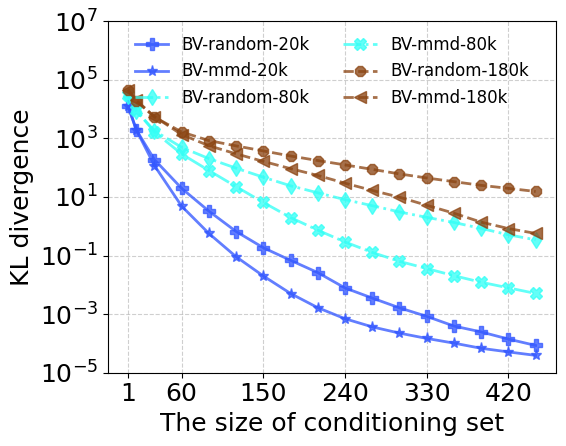

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 18  # You can set any numeric value here

fig_dir = './fig'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

markers = ['P', '*', 'd', 'X', '8', '<', '>', '^', 's']
colors = [
    "#3357FF",  # Royal blue
    "#33FFF6",  # Cyan
    "#8B4513",  # Saddle brown
    "#FF33F6",  # Magenta
    "#FF5733",  # Reddish-orange
    "#33FF57",  # Bright green
    "#FF69B4",   # Hot pink
    "#F6FF33",  # Yellow
]
linestyles = ['-', '-.', '--']

ymax = np.max(allh)
ymin = np.min(allh)

def plot_kl(N, cs_set, allh):
    fig, ax = plt.subplots(figsize=(6, 4.8))
    flag = 0
    for i_n, n in enumerate(N):
        for i_ord, ord in enumerate(orderings):
            ax.plot(cs_set, allh[i_n, i_ord, : , 0], label="BV-" + str(ord) + "-" + str(int(n/1000)) + "k",  
                    linewidth=2, color=colors[i_n], 
                    linestyle=linestyles[i_n], alpha=0.77,
                    marker=markers[flag], markersize=8)
            flag = flag + 1
    ax.set_xlabel('The size of conditioning set')
    ax.set_ylabel('KL divergence')
    ax.set_ylim(1e-5, 1e7)
    ax.set_yscale('log')
    legend = ax.legend(ncol = 2, fontsize=12, loc='upper center')
                        #, bbox_to_anchor=(0.5, -0.5) )
                        # title = 'Conditioning size') #loc='lower center', bbox_to_anchor=(0.5, -0.3) 
    legend.get_frame().set_alpha(0.)  # 50% transparency
    ax.grid(True, linestyle='--', alpha=0.6)
    _list_xtick = cs_set[::3]
    plt.xticks(_list_xtick, _list_xtick)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_folder, f'kl-largeN.pdf'))
    # plt.show()

plot_kl(N, cs_set, allh)